#Self Organizing Map

##Install MiniSom Package

In [15]:
!pip install MiniSom

### Importing the libraries


In [2]:
import numpy as np
import pandas as pd

import matplotlib

## Importing the dataset

In [3]:
dataset = pd.read_csv('drosophila.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [14]:
from minisom import MiniSom
som = MiniSom(x=100, y=100, input_len= 6, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

ValueError: Received 15 features, expected 6.

##Visualizing the results


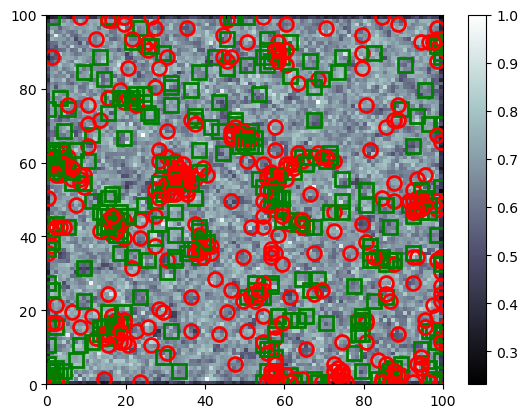

In [11]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()